In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = "bold"

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Grafiklerin her birinde xlabel, ylabel ve title olsun. Başkası grafiğe baktığında anlayabilsin, grafikler kendini açıklayıcı olsun.

Renklendirmeler ve marker seçimleri uyumlu olsun.

Parametreler için seaborn'un kendi sitesinden faydalanabilirsiniz.

In [ ]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.

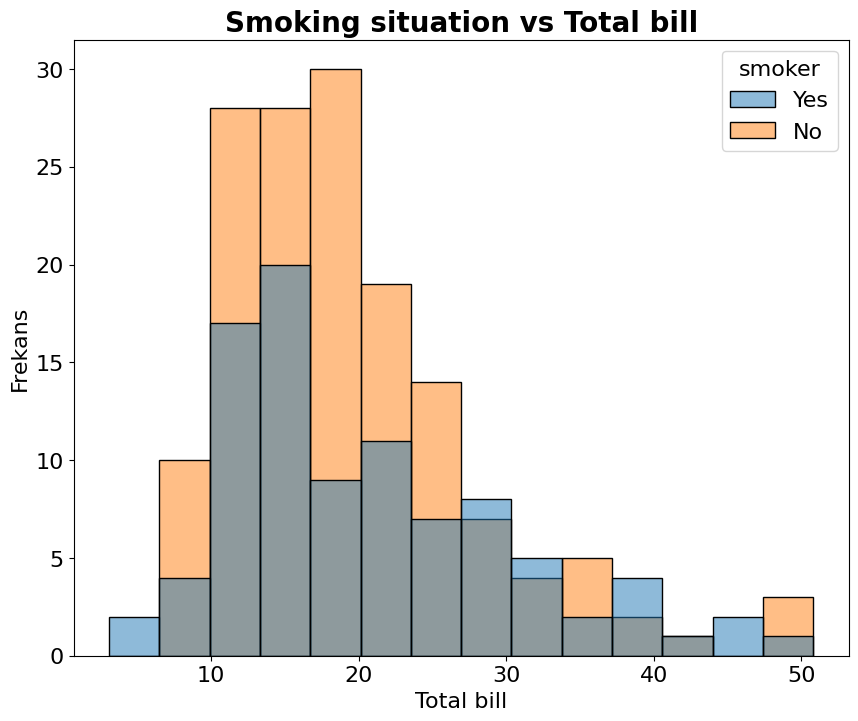

In [56]:
sns.histplot(data = tips, x = "total_bill", hue = "smoker", alpha = 0.5)

plt.title("Smoking situation vs Total bill")
plt.xlabel("Total bill")
plt.ylabel("Frekans")
plt.show()

In [ ]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.

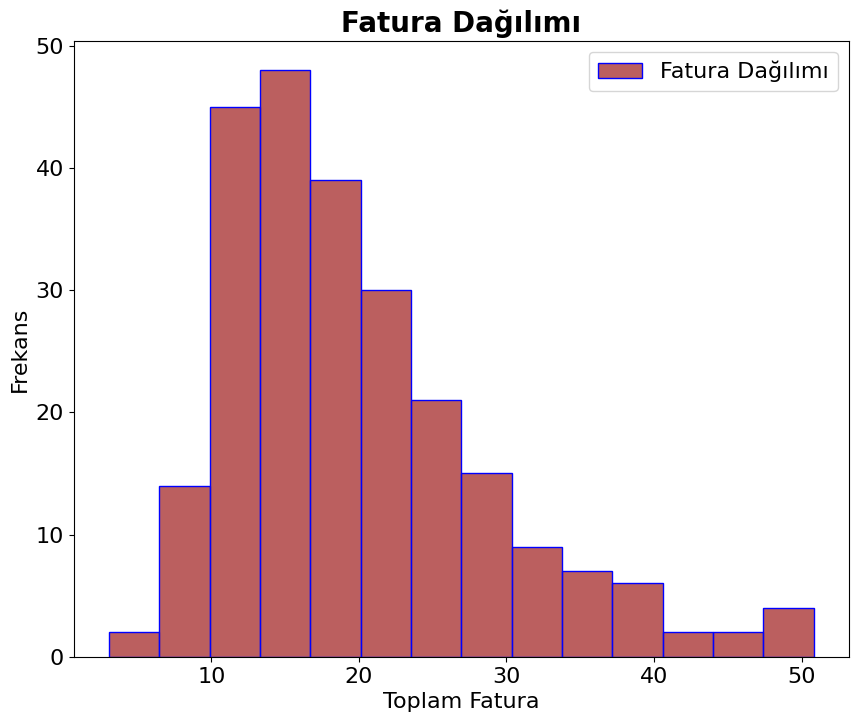

In [57]:
sns.histplot(data = tips, x = "total_bill", label = "Fatura Dağılımı", 
             color = "brown", edgecolor = "blue", )

plt.title("Fatura Dağılımı")
plt.xlabel("Toplam Fatura")
plt.ylabel("Frekans")
plt.legend()
plt.show()

In [ ]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.

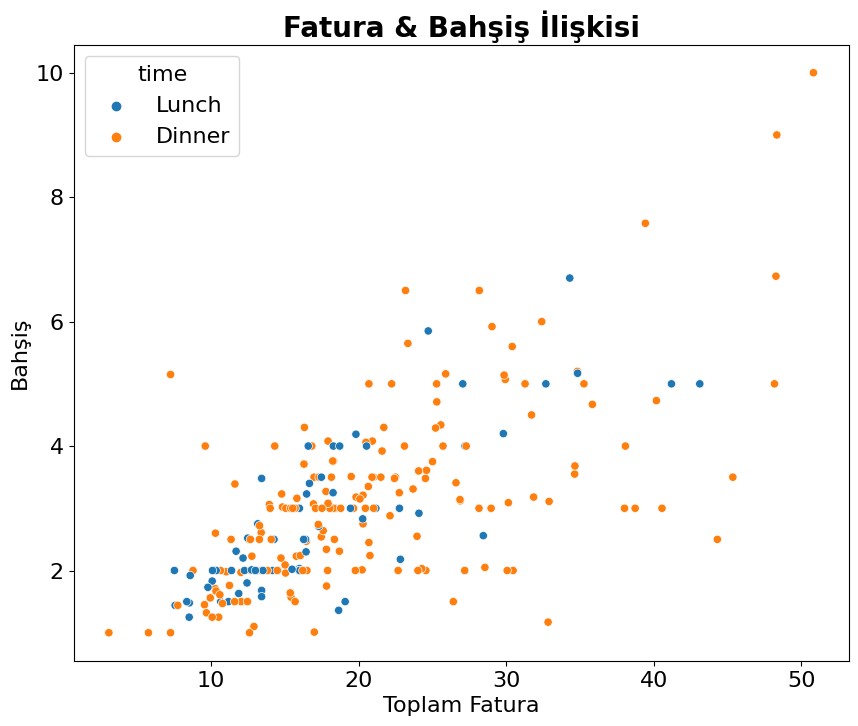

In [60]:
sns.scatterplot(data = tips, x = "total_bill", y = "tip",
            hue = "time"
            )
plt.title("Fatura & Bahşiş İlişkisi")
plt.xlabel("Toplam Fatura")
plt.ylabel("Bahşiş")
plt.show()

In [ ]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.

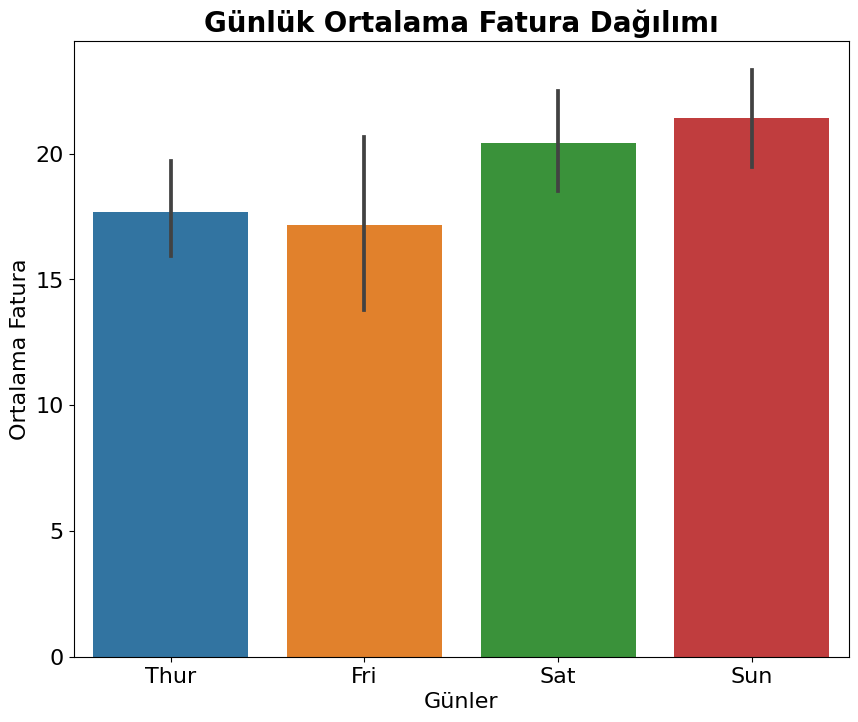

In [30]:
sns.barplot(data = tips, x = "day", y = "total_bill")

plt.title("Günlük Ortalama Fatura Dağılımı")
plt.xlabel("Günler")
plt.ylabel("Ortalama Fatura")
plt.show()

In [ ]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.

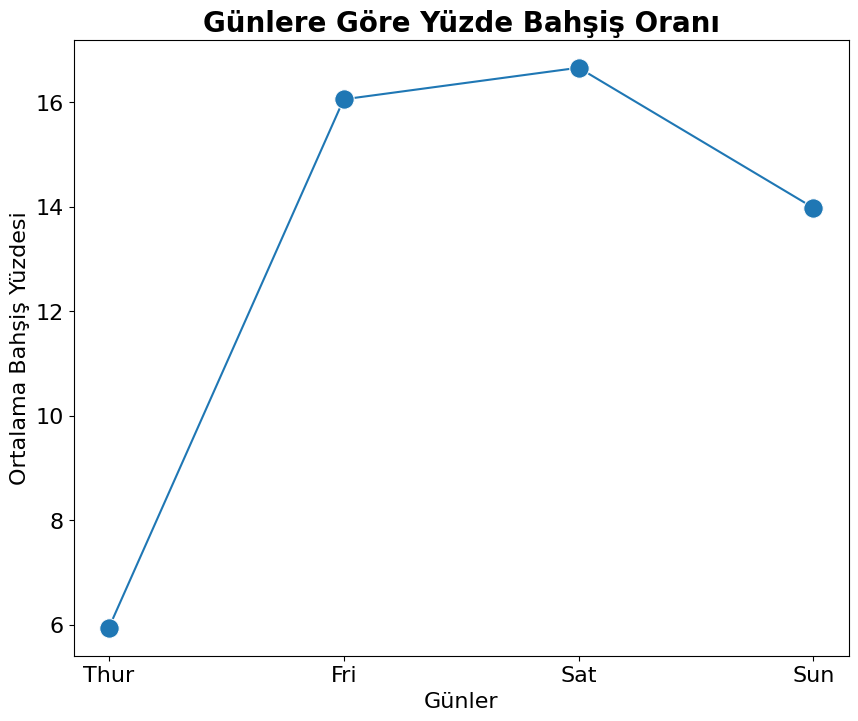

In [39]:
tips["bahsis_yuzde"] = (tips["tip"] / tips["total_bill"]) * 100
gunluk_ort_bahsis = tips.groupby("day")["bahsis_yuzde"].mean().reset_index()

sns.lineplot(data = gunluk_ort_bahsis, x = "day", y = bahsis_yuzde,
             marker = "o", markersize = 14)

plt.title("Günlere Göre Yüzde Bahşiş Oranı")
plt.xlabel("Günler")
plt.ylabel("Ortalama Bahşiş Yüzdesi")
plt.show()

In [ ]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.

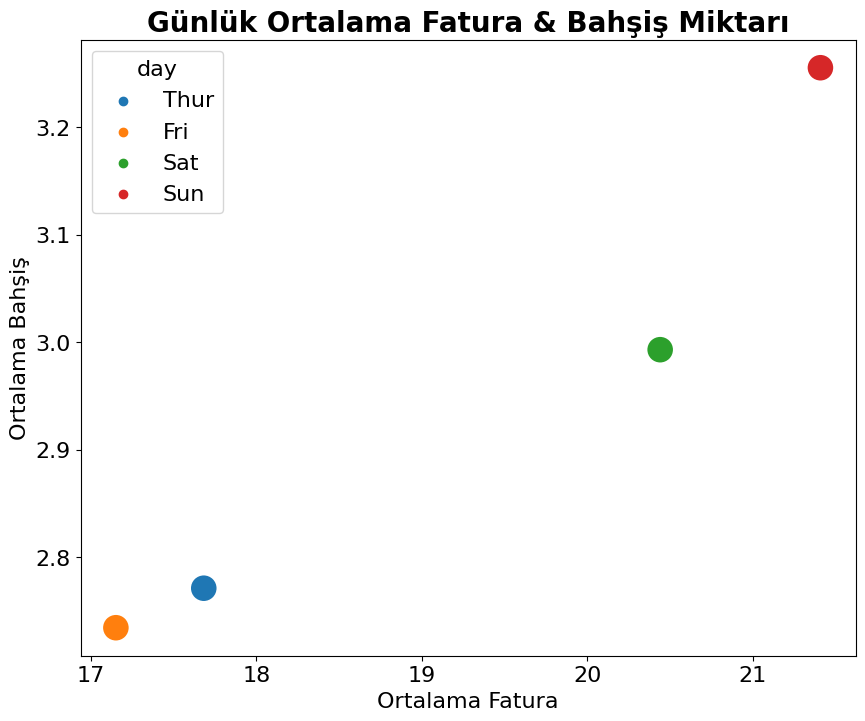

In [44]:
ortfatura_ortbahsis = tips.groupby("day").agg({"total_bill": "mean",
                                                          "tip": "mean"}).reset_index()

sns.scatterplot(data = ortfatura_ortbahsis, x = "total_bill", y = "tip",
                hue = "day", s = 400)

plt.title("Günlük Ortalama Fatura & Bahşiş Miktarı")
plt.xlabel("Ortalama Fatura")
plt.ylabel("Ortalama Bahşiş")
plt.show()

In [ ]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.

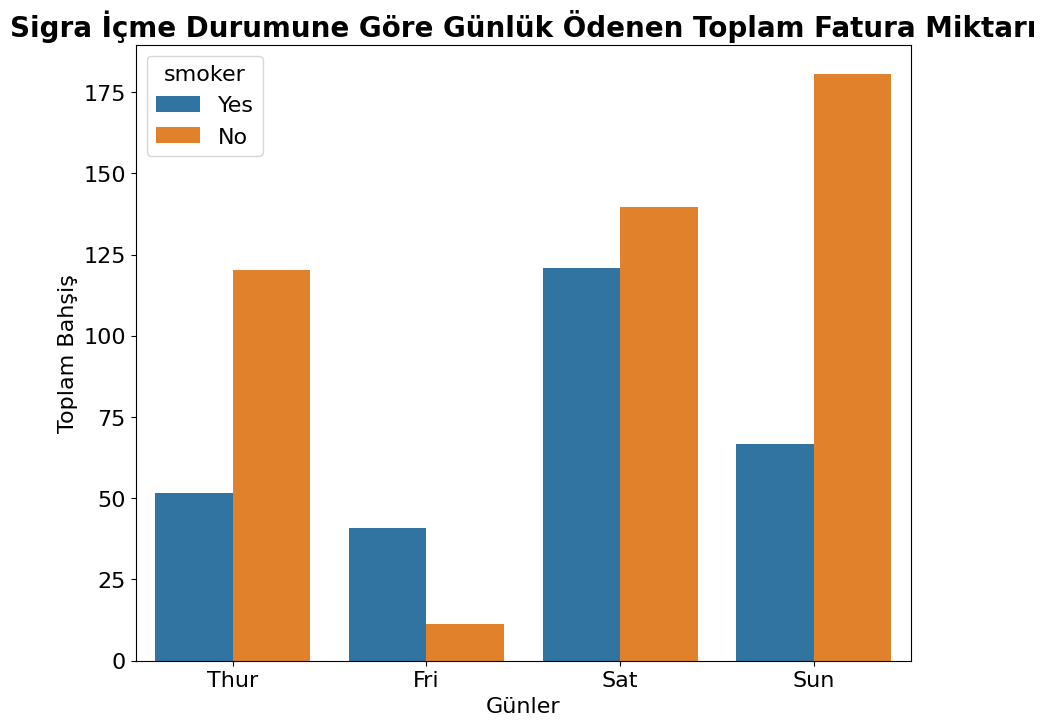

In [67]:
gunvesigara_bahsisort = tips.groupby(["day", "smoker"]).agg({"tip": "sum"}).reset_index()

sns.barplot(data = gunvesigara_bahsisort, x = "day", y = "tip", hue = "smoker")
plt.title("Sigra İçme Durumune Göre Günlük Ödenen Toplam Fatura Miktarı")
plt.xlabel("Günler")
plt.ylabel("Toplam Bahşiş")
plt.show()

In [ ]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.

<function matplotlib.pyplot.show(close=None, block=None)>

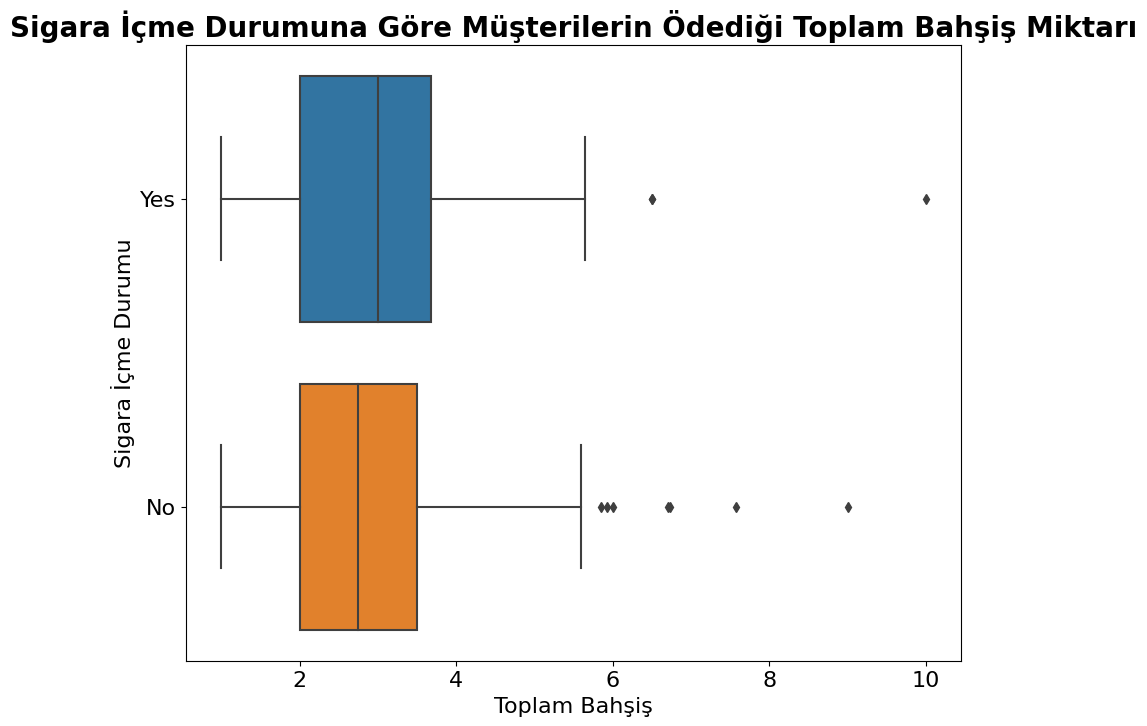

In [49]:
sns.boxplot(data = tips, x = "tip", y = "smoker", orient = "h")

plt.title("Sigara İçme Durumuna Göre Müşterilerin Ödediği Toplam Bahşiş Miktarı")
plt.xlabel("Toplam Bahşiş")
plt.ylabel("Sigara İçme Durumu")
plt.show()

In [ ]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.

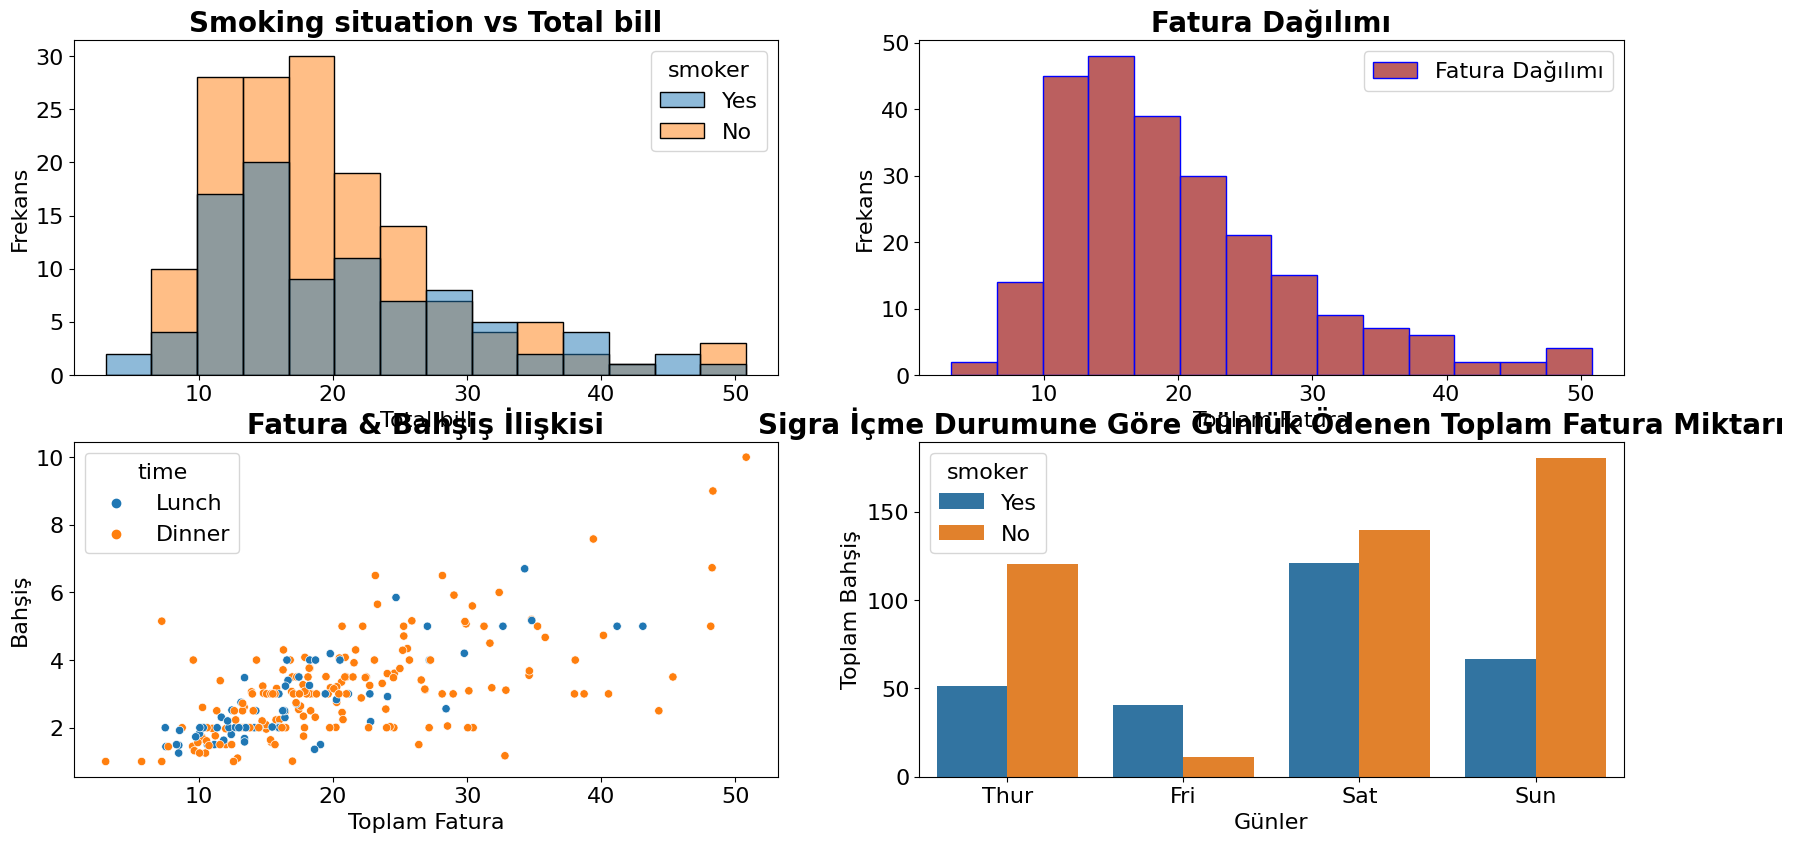

In [69]:
plt.figure(figsize = (20, 20))

plt.subplot(4,2,1)
sns.histplot(data = tips, x = "total_bill", hue = "smoker", alpha = 0.5)
plt.title("Smoking situation vs Total bill")
plt.xlabel("Total bill")
plt.ylabel("Frekans")

plt.subplot(4,2,2)
sns.histplot(data = tips, x = "total_bill", label = "Fatura Dağılımı", 
             color = "brown", edgecolor = "blue", )
plt.title("Fatura Dağılımı")
plt.xlabel("Toplam Fatura")
plt.ylabel("Frekans")
plt.legend()

plt.subplot(4,2,3)
sns.scatterplot(data = tips, x = "total_bill", y = "tip",
            hue = "time"
            )
plt.title("Fatura & Bahşiş İlişkisi")
plt.xlabel("Toplam Fatura")
plt.ylabel("Bahşiş")

plt.subplot(4,2,4)
sns.barplot(data = gunvesigara_bahsisort, x = "day", y = "tip", hue = "smoker")
plt.title("Sigra İçme Durumune Göre Günlük Ödenen Toplam Fatura Miktarı")
plt.xlabel("Günler")
plt.ylabel("Toplam Bahşiş")

plt.show()